In [ ]:
# content base filtering

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df1=pd.read_csv('u.data',names=column_names,sep='\t')

In [6]:
df1.head(1)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949


In [7]:
df2=pd.read_csv('Movie_Id_Titles')

In [10]:
df2.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [37]:
data= pd.merge(df1,df2,on="item_id")

In [38]:
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [19]:
(data['title'].nunique())

1664

In [23]:
data.groupby('title')['rating'].mean().sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [25]:
data.groupby('title')['rating'].count().sort_values(ascending=False)

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [34]:
movie=pd.DataFrame(data.groupby('title')['rating'].mean())

In [35]:
movie.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [39]:
movie['no_of_rating']=pd.DataFrame(data.groupby('title')['rating'].count())

In [41]:
movie.head()

,rating,no_of_rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [47]:
heat=movie.corr(numeric_only=True)

<Axes: >

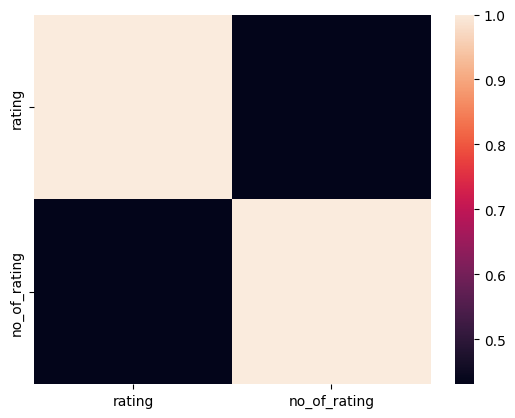

In [48]:
sns.heatmap(heat)

In [49]:
movie.head()

,rating,no_of_rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


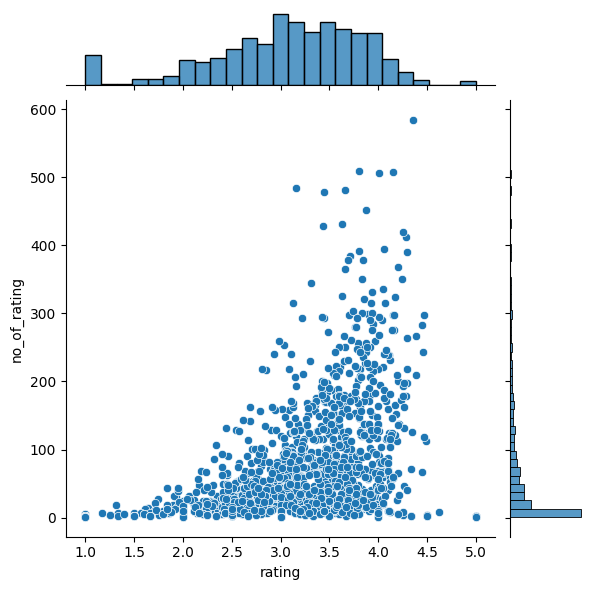

In [51]:
sns.jointplot(x='rating',y='no_of_rating',data=movie)

In [53]:
movie[movie['no_of_rating']>=500]

,rating,no_of_rating
title,,
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Star Wars (1977),4.359589,584


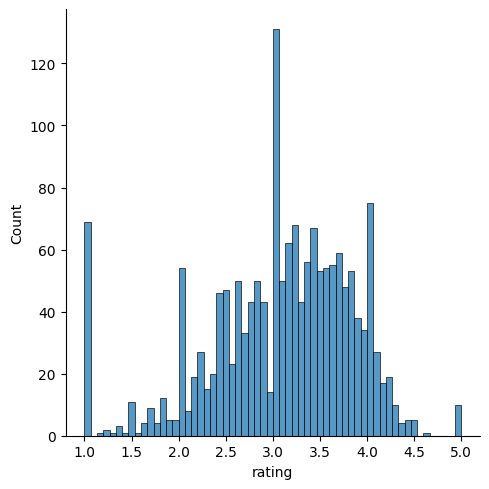

In [54]:
sns.displot(movie['rating'],bins=60)

In [55]:
 # now develop main recomendation system 

# first need to make a pivort table

In [56]:
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [59]:
main= data.pivot_table(index='user_id',values='rating',columns='title')
main.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
data['title'].value_counts().head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: count, dtype: int64

In [64]:
fargro=main['Fargo (1996)']

In [65]:
fargro_cor_with=main.corrwith(fargro)

c:\Users\Om Soni\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Om Soni\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\Om Soni\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\Om Soni\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\Om Soni\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [67]:
fargro_cor_with=pd.DataFrame(fargro_cor_with,columns=['correlation'])

In [69]:
fargro_cor_with.head() # this coreealted nut base on rating but we want base on no_of rating

,correlation
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509


In [75]:
fargro_cor_with.dropna(inplace=True)

In [76]:
fargro_cor_with.isnull().sum()

correlation    0
dtype: int64

In [80]:
fargro_cor_with.sort_values('correlation',ascending=False).head(5) # this base on rating but we alse want base on no_of_rating

,correlation
title,
Open Season (1996),1.0
Maya Lin: A Strong Clear Vision (1994),1.0
Captives (1994),1.0
City of Industry (1997),1.0
"Convent, The (Convento, O) (1995)",1.0


In [88]:
fargro_cor_with=fargro_cor_with.join(movie['no_of_rating'])

In [90]:
fargro_cor_with.drop('rating',axis=1,inplace=True)

In [92]:
fargro_cor_with.head()

,correlation,no_of_rating
title,,
'Til There Was You (1997),0.100000,9
1-900 (1994),0.866025,5
101 Dalmatians (1996),-0.245368,109
12 Angry Men (1957),0.098676,125
187 (1997),0.142509,41


In [85]:
#$ now we will se correct recomendation

In [95]:
fargro_cor_with[fargro_cor_with['no_of_rating']>100].sort_values('correlation',ascending=False).head(10)

,correlation,no_of_rating
title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173
True Romance (1993),0.345781,104
Raging Bull (1980),0.344163,116
"People vs. Larry Flynt, The (1996)",0.341784,215
"Magnificent Seven, The (1954)",0.338462,121


,rating,no_of_rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [103]:
def corealtion():
    corr=main[input("enter your movie")]
    movie_corr=main.corrwith(corr)
    movie_corr=pd.DataFrame(movie_corr,columns=['correlation'])
    movie_corr.dropna(inplace=True)
    movie_corr=movie_corr.join(movie['no_of_rating'])
    return movie_corr[movie_corr['no_of_rating']>100].sort_values('correlation',ascending=False).head()

In [104]:
print(corealtion())

                           correlation  no_of_rating
title                                               
Fargo (1996)                  1.000000           508
Sling Blade (1996)            0.381159           136
Lone Star (1996)              0.370915           187
Quiz Show (1994)              0.355031           175
Lawrence of Arabia (1962)     0.353408           173


c:\Users\Om Soni\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Om Soni\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\Om Soni\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\Om Soni\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\Om Soni\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [101]:
def correlation():
    movie_name = input("Enter your movie: ")
    
    if movie_name not in main.columns:
        return f"Movie '{movie_name}' not found in dataset."
    
    corr = main[movie_name]
    movie_corr = main.corrwith(corr)
    
    movie_corr = pd.DataFrame(movie_corr, columns=['correlation'])
    movie_corr.dropna(inplace=True)
    
    if 'no_of_rating' not in movie.columns:
        return "Error: 'no_of_rating' column is missing in movie dataset."
    
    movie_corr = movie_corr.join(movie[['no_of_rating']], how='inner')

    return movie_corr[movie_corr['no_of_rating'] > 100].sort_values('correlation', ascending=False).head()


In [102]:
print(corealtion())

                           correlation  no_of_rating
title                                               
Fargo (1996)                  1.000000           508
Sling Blade (1996)            0.381159           136
Lone Star (1996)              0.370915           187
Quiz Show (1994)              0.355031           175
Lawrence of Arabia (1962)     0.353408           173


c:\Users\Om Soni\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Om Soni\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\Om Soni\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\Om Soni\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\Om Soni\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [100]:
movie.head()

,rating,no_of_rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
